## How to Run the Data Import Code

### In a Kaggle Notebook

1. **Copy and Paste the Code:**
   - Copy the provided code into a cell in your Kaggle Notebook.

2. **Run the Cell:**
   - Execute the cell to download and extract the datasets directly into the `/kaggle/input` directory.

### In Google Colab

To run this code in Google Colab, follow these steps:

1. **Copy the Code:**
   - Copy the provided code into a cell in your Google Colab notebook.

2. **Modify the Paths:**
   - Change the paths for the dataset to your desired directory in Google Colab.
   
3. **Mount Google Drive:**
   - If you are using Google Drive to store the datasets, mount Google Drive by running the following code in a new cell:
     ```python
     from google.colab import drive
     drive.mount('/content/drive')
     ```

4. **Run the Cell:**
   - Execute the cell to download and extract the datasets into your specified directory.

Here's an example of how you might modify the paths for Google Colab:


KAGGLE_INPUT_PATH = '/content/dataset'
KAGGLE_WORKING_PATH = '/content/working'

## How to Run the Data Import Code on a Local Machine

1.  IDownload the Datasets 
   - Download the datasets from the following Kaggle URLs:
     - [Liver Tumor Segmentation](https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation)
     - [Liver Tumor Segmentation Part 2](https://www.kaggle.com/datasets/andrewmvd/liver-tumor-segmentation-part-2)

2. **Set Up Your Environment:**
   - Ensure you have Python and necessary libraries installed (e.g., pandas, numpy).

3. **Modify the Paths:**
   - Set the paths to the directories where you have saved the downloaded datasets.

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'liver-tumor-segmentation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F767686%2F1327578%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240820%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240820T102507Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d6c52ddf1031faa7234aa4b4ff9790a50ba625d1c34c90b95c34b6674a1a42f9543547004abaa4d4cf690912c78ea6e7b3ad45a23e8ce628463c9d373bca98cc0034a34d7c59c9e4df6bade646d63025637073b135c14d1c54259fbf7a1bb878a497b687cb2ecac4c3254d99155aa351b48042324d922d45d4c60ca55bebcd181a1a8d4f05c49482604c0413519dd283cd0fc5934934b12e43025e270c4f9ec69821fa3c84fd6b5b3974e461588487a830e702494a72b10896b35b31198b0b01a2196b59f2472de10cecb2fde55d738b510f1f4f37385944f366ae864090acf001b388216b7dcd38d4b09f4992553bd5d7ad1b9ad1a1bd62fae42ad194c70fa,liver-tumor-segmentation-part-2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F769463%2F1327590%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240820%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240820T102507Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8357ad4e7d1dcf3b0bea0d5ab6f0ef3ebe29579468d752ce7958945432d03d3b3cf7aadda5a4552036fbe38b10643681e725bbb6bbcc7b7190af8582ec40e22ce46a040f12571d2df10c076cad9728ddbf55e752cad98fda377b3a85d79aaab00773d662f78822e92fd8831ebf1ee503db293709d97922825b3b5dab7b9f704be247f21ffdb73bec27a07ee6858baf782160ce4817abfc6de19f3fdd941f6f2799653bd35b1f34ce97680ade7495d35f4d283d1ee3575377b9d5b60cdfd6d3bd0056e176dfa3ffb07ead1d2b9179772d3ebdfe0b9750f92fe34fc54f4230583f0fb6dab99c0b9cbc12258be8964cb7316d47146f379a567041e9dd1cda836bc4,liver-tumor-unet/tensorflow2/default/1:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F79933%2F95315%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240820%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240820T102507Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9e3881ec1c46fb2fbbcd2536a69fceb40d095552a45be44f99d6a8c2c176068002b04732b04e1b27b4e60da3aacbc0a15f73f693d421df83685c17f5a403a6074ad55b523d48475cf8b07be5c082e24472bc6e1c5c2494d45dd79432d75241e0fd417dbd3ad9415e43e798fde321b196fab4261b3f3eccafb7a592feb978af4f6c806bc3665176c964a3b8de0b9be0b698ed3743f9abdfe8c4de90d0de5b3b92b107a0aa10e2a273fb0a722f2cccb3e8d72bfd90176f3b1b359a67db5e6590d17311578fa8d9f18ae6301cf89deae101e03d5ed51bf7987459decc89606be4da957ba9c934951ba92667f969fb0045c1faafbd0727ab4c0ad7a5104cf2a6e3d8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# 1.Introduction
# Liver Segmentation using U-Net

This notebook demonstrates the implementation of a U-Net model for liver segmentation from medical images. Liver segmentation is a crucial step in medical image analysis, aiding in diagnosis, treatment planning, and disease monitoring.

## Objectives
- Develop a U-Net model for liver segmentation.
- Train the model on medical imaging data.
- Evaluate the model's performance.
- Perform inference and visualize the segmentation results.


# 2. Imports and Configuration

In [ ]:
!nvidia-smi

In [1]:
import numpy as np  # Fundamental package for scientific computing, provides support for arrays, matrices, and mathematical functions
import pandas as pd  # Powerful data manipulation and analysis library, offers data structures like Series and DataFrame
import os  # Provides a way of using operating system-dependent functionality like reading or writing to the file system
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations in Python
import glob  # Used to retrieve files/pathnames matching a specified pattern
import nibabel as nib  # Library for reading and writing medical imaging data, especially in NIfTI format
import cv2  # OpenCV, a library for computer vision tasks, such as image processing and video capture
import imageio  # Library for reading and writing image data, supporting many formats including animated images
from tqdm.notebook import tqdm  # Progress bar library to show loops progress in Jupyter Notebooks
from ipywidgets import *  # Provides interactive HTML widgets for Jupyter notebooks and the IPython kernel
from PIL import Image  # Python Imaging Library, adds image processing capabilities to Python
from fastai.basics import *  # Importing core functionalities of Fastai, a deep learning library
from fastai.vision.all import *  # Importing all functionalities related to computer vision from Fastai
from fastai.data.transforms import *  # Importing data transformation utilities from Fastai
import tensorflow as tf
import wandb # Importing weight and bais module
from wandb.integration.keras import WandbCallback #callback for weight and bais
from tensorflow.keras.callbacks import TensorBoard #callback module for tensorbaord
import datetime

In [2]:
# Initialize Weights & Biases
wandb.init(project="Liver_segment_U-net")
## you will need to login to weight and bais account copy paste the ap key

wandb: Currently logged in as: ojshavsaxenaa (aviojs). Use `wandb login --relogin` to force relogin


## TensorBoard Integration
    Import and Initialize TensorBoard:

In [3]:
# Set up log directories for TensorBoard
## since there are three different models so i have made different directories for them
log_dir1 = "logs/fit/model1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir2 = "logs/fit/model2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir3 = "logs/fit/model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback1 = TensorBoard(log_dir=log_dir1, histogram_freq=1, write_images=True)
tensorboard_callback2 = TensorBoard(log_dir=log_dir2, histogram_freq=1, write_images=True)
tensorboard_callback3 = TensorBoard(log_dir=log_dir3, histogram_freq=1, write_images=True)

## Data Preparation

### Creating Metadata

This section creates a metadata file for processing `.nii` files. It maps CT scan files with their corresponding label files and filters out unnecessary rows.



#### If you want to run this in google/local machine 
## Note on Dataset Path Update

After downloading the dataset, you'll need to update the dataset path in the code to ensure proper processing of the NIfTI files. Follow these steps:

1. **Locate the Path in Code**:
   Find the section in your code where the dataset paths are defined. It should look something like this:
   
   ```python
   for dirname, _, filenames in os.walk('liver-tumor-segmentation'):
       for filename in filenames:
           file_list.append((dirname, filename))
   
   for dirname, _, filenames in os.walk('liver-tumor-segmentation-part-2'):
       for filename in filenames:
           file_list.append((dirname, filename))


In [4]:
# Create a meta file for nii files processing
file_list = []
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation'):
    for filename in filenames:
        file_list.append((dirname,filename)) 

for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation-part-2'):
    for filename in filenames:
        file_list.append((dirname,filename)) 

df_files = pd.DataFrame(file_list, columns =['dirname', 'filename']) 
df_files.sort_values(by=['filename'], ascending=True)    

,dirname,filename
89,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
81,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
142,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
31,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-100.nii
45,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-101.nii
...,...,...
243,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-95.nii
222,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-96.nii
217,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-97.nii
252,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-98.nii


In [5]:
# Map CT scan and label 

df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

df_files_test= df_files[df_files.mask_filename=='']
# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))
df_files


131


,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-100.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-100.nii
4,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-101.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-101.nii
...,...,...,...,...
126,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-95.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-95.nii
127,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-96.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-96.nii
128,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-97.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-97.nii
129,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-98.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-98.nii


### Reading NIfTI Files

A helper function to read `.nii` files and return a pixel array.


In [6]:
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [7]:
# Read sample
sample = 0
sample_ct   = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask  = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
print(sample_ct.shape) 
print(sample_mask.shape)
print(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

(512, 512, 75)
(512, 512, 75)
/kaggle/input/liver-tumor-segmentation/volume_pt1/volume-0.nii


In [8]:
print(np.amin(sample_ct), np.amax(sample_ct))
print(np.amin(sample_mask), np.amax(sample_mask))

-3024.0 1410.0
0.0 2.0


## Image Processing

### Preprocessing Functions

This section defines various preprocessing functions for CT scan images, including HU windowing, CLAHE, Z-score normalization, median filtering, and DWT enhancement.


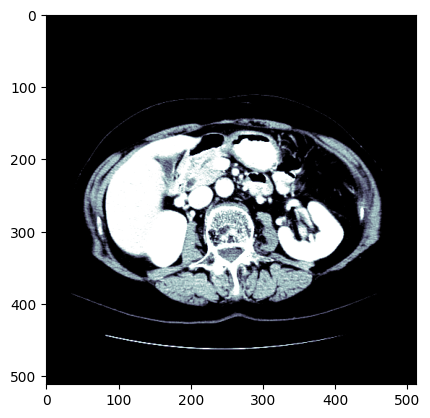

In [9]:
# Preprocess the nii file 
# Source https://docs.fast.ai/medical.imaging

dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)


@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);


In [10]:
print(type(sample_ct[..., 50]))



<class 'numpy.ndarray'>


## Visualization

Define a helper function to visualize the original image, windowed image, mask, and combined liver and mask.


In [11]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

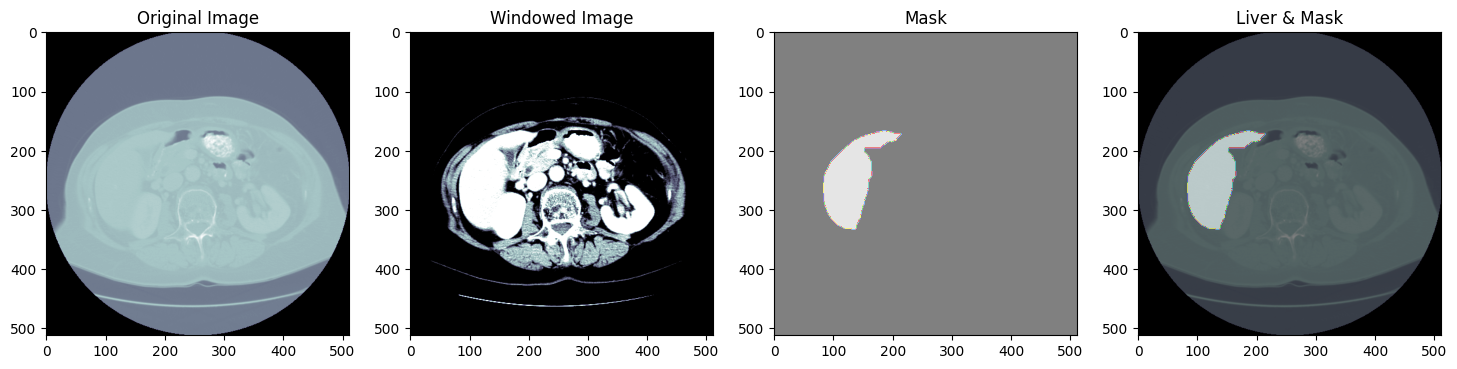

In [12]:
sample=50
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[...,sample], sample_mask[...,sample]])

In [13]:
# Check the mask values
mask = Image.fromarray(sample_mask[...,sample].astype('uint8'), mode="L")
unique, counts = np.unique(mask, return_counts=True)
print( np.array((unique, counts)).T)

[[     0 252049]
 [     1  10095]]


### Additional Preprocessing Functions

Define additional preprocessing functions for CT scan images using the `fastai` library.


<Axes: >

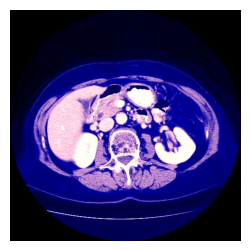

In [14]:
# Preprocessing functions
# Source https://docs.fast.ai/medical.imaging

class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    ''''"A function to split the range of pixel values into groups, 
    such that each group has around the same number of pixels"'''
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
    
    
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs=subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0])

In [15]:
df_files_1=df_files[0:30]
df_files_1

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt6,volume-100.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-100.nii
4,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-101.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-101.nii
5,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-102.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-102.nii
6,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-103.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-103.nii
7,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-104.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-104.nii
8,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-105.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-105.nii
9,/kaggle/input/liver-tumor-segmentation-part-2/volume_pt8,volume-106.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-106.nii


## Generating Training Data

Convert NIfTI files to JPEG images for U-Net training.


In [ ]:
import random
import os
from tqdm import tqdm
from pathlib import Path
import numpy as np
from PIL import Image

# Define whether to generate JPG files or use pre-saved ones
GENERATE_JPG_FILES = True  

if GENERATE_JPG_FILES:
    # Set the current path
    path = Path(".")

    # Create directories for training images and masks if they don't exist
    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    # Randomly select half of the indices from the dataframe
    random_indices = random.sample(range(len(df_files)), len(df_files) // 2)

    # Loop through the selected indices to process the nii files
    for ii in tqdm(random_indices):  # Take 1/2 nii files for training
        # Read the current CT scan and corresponding mask
        curr_ct = read_nii(df_files.loc[ii, 'dirname'] + "/" + df_files.loc[ii, 'filename'])
        curr_mask = read_nii(df_files.loc[ii, 'mask_dirname'] + "/" + df_files.loc[ii, 'mask_filename'])
        
        # Extract the file name without the extension
        curr_file_name = str(df_files.loc[ii, 'filename']).split('.')[0]
        
        # Get the number of slices in the CT scan
        curr_dim = curr_ct.shape[2]  # Shape is (512, 512, curr_dim)

        # Loop through every 2nd slice to save as images for training
        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            
            # Save the CT slice as a JPG image
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            
            # Save the corresponding mask as a PNG image
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")
else:
    # Set the path to the pre-saved kernel output if not generating new files
    path = Path("liver-segmentation-with-fastai-v2")


## Metadata for Training Data

Create a metadata file for the generated JPEG images.


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Set the directories
images_dir = 'train_images'
masks_dir = 'train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(images_dir))

# Randomly select 9000 images
selected_image_file_names = random.sample(all_image_file_names, 9000)

# Load selected images and masks with resizing
target_size = (128, 128)
images = [np.array(Image.open(os.path.join(images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
masks = [np.array(Image.open(os.path.join(masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
images = np.array(images)
masks = np.array(masks)

# Normalize images to [0, 1]
images = images / 255.0

# Reshape masks to include a channel dimension
masks = masks.reshape((masks.shape[0], masks.shape[1], masks.shape[2], 1))

# Convert masks to one-hot encoding
masks = to_categorical(masks, num_classes=3)

# Print the shapes to confirm changes
print("Images shape:", images.shape)
print("Masks shape:", masks.shape)

Images shape: (9000, 128, 128, 3)
Masks shape: (9000, 128, 128, 3)


## Train-Test Split

Split the data into training, validation, and test sets using an 80-10-10 split.


In [17]:
# Split the data into training, validation, and test sets
# 70% training, 20% validation, 10% test
x_train, x_temp, y_train, y_temp = train_test_split(images, masks, test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)

## Data Visualization

Visualize one of the generated masks to ensure correctness.


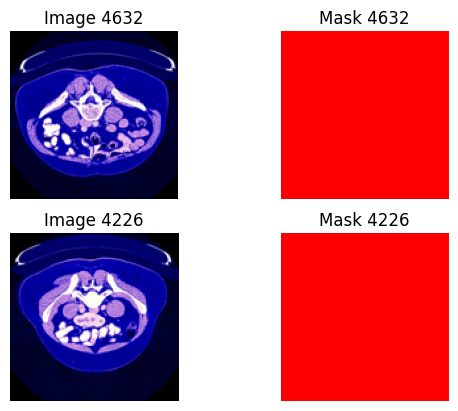

In [18]:
import matplotlib.pyplot as plt

# Function to display images and masks
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select samples
    sample_indices = random.sample(range(images.shape[0]), num_samples)

    for i in range(num_samples):
        index = sample_indices[i]

        # Display the image
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[index])
        plt.title("Image {}".format(index))
        plt.axis("off")

        # Display the mask
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[index].squeeze(), cmap='gray')
        plt.title("Mask {}".format(index))
        plt.axis("off")
    plt.show()

    
# Display two random images and masks
display_images_and_masks(x_train, y_train)


In [19]:
y_train.shape, x_train.shape

((6300, 128, 128, 3), (6300, 128, 128, 3))

# Custom Metrics for Binary Segmentation

This document explains various custom metrics used to evaluate binary segmentation models. Each metric provides different insights into model performance.

## 1. Dice Coefficient

The Dice Coefficient measures the overlap between the predicted and true binary masks, which is particularly useful for imbalanced datasets.

- **Formula:** 
  $$
  \text{Dice Coefficient} = \frac{2 \cdot \text{Intersection} + \text{smooth}}{\text{Union} + \text{smooth}}
  $$
- **Intersection:** Sum of element-wise multiplication of the true and predicted masks.
- **Union:** Sum of the true mask and the predicted mask.
- **Smooth:** A small constant added to avoid division by zero.

## 2. Mean Intersection over Union (IoU)

Mean IoU calculates the average intersection over union for binary masks, measuring the accuracy of the predicted segmentation compared to the ground truth.

- **Formula:**
  $$
  \text{Mean IoU} = \frac{\text{Intersection} + \text{smooth}}{\text{Union} - \text{Intersection} + \text{smooth}}
  $$
- **Intersection:** Sum of element-wise multiplication of the true and predicted masks.
- **Union:** Sum of the true mask and the predicted mask.

## 3. Accuracy

Accuracy measures the proportion of correctly classified pixels in the binary masks, reflecting the ratio of correct predictions to the total number of pixels.

- **Formula:**
  $$
  \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
  $$
- **Correct Predictions:** Number of pixels where the predicted mask matches the true mask.
- **Total Predictions:** Total number of pixels in the masks.

## 4. Precision

Precision measures the proportion of true positives among the predicted positives.

- **Formula:**
  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{Predicted Positives}}
  $$
- **True Positives:** Sum of element-wise multiplication of the true and predicted masks.
- **Predicted Positives:** Sum of the predicted mask.

## 5. Recall

Recall measures the proportion of true positives among the actual positives.

- **Formula:**
  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{Possible Positives}}
  $$
- **True Positives:** Sum of element-wise multiplication of the true and predicted masks.
- **Possible Positives:** Sum of the true mask.

## 6. Specificity

Specificity measures the proportion of true negatives among the actual negatives.

- **Formula:**
  $$
  \text{Specificity} = \frac{\text{True Negatives}}{\text{Possible Negatives}}
  $$
- **True Negatives:** Sum of element-wise multiplication of the inverted true and predicted masks.
- **Possible Negatives:** Sum of the inverted true mask.

## 7. F1 Score

The F1 Score combines precision and recall into a single metric.

- **Formula:**
  $$
  \text{F1 Score} = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}}
  $$
- **Precision:** Proportion of true positives among the predicted positives.
- **Recall:** Proportion of true positives among the actual positives.

## 8. Jaccard Index

The Jaccard Index measures the similarity between the predicted and true binary masks.

- **Formula:**
  $$
  \text{Jaccard Index} = \frac{\text{Intersection} + \text{smooth}}{\text{Union} - \text{Intersection} + \text{smooth}}
  $$
- **Intersection:** Sum of element-wise multiplication of the true and predicted masks.
- **Union:** Sum of the true mask and the predicted mask.
- **Smooth:** A small constant added to avoid division by zero.


In [20]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D, Conv2DTranspose, concatenate, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping




# Define Dice coefficient as a metric
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true, axis=-1) + K.sum(y_pred, axis=-1)
    return (2. * intersection + smooth) / (union + smooth)

# Define Mean IoU for binary masks
def mean_iou(y_true, y_pred, smooth=1):
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    intersect = K.sum(y_true * y_pred, axis=[0, -1, -2])
    union = K.sum(y_true + y_pred, axis=[0, -1, -2])
    return (intersect + smooth) / (union - intersect + smooth)


def accuracy(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    correct_predictions = K.sum(K.cast(K.equal(y_true, y_pred), K.floatx()), axis=[0, -1, -2])
    total_predictions = K.cast(K.prod(K.shape(y_true)[:-1]), K.floatx())
    return correct_predictions / total_predictions

def precision(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    true_positives = K.sum(y_true * y_pred, axis=[0, -1, -2])
    predicted_positives = K.sum(y_pred, axis=[0, -1, -2])
    return true_positives / (predicted_positives + K.epsilon())

def recall(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    true_positives = K.sum(y_true * y_pred, axis=[0, -1, -2])
    possible_positives = K.sum(y_true, axis=[0, -1, -2])
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    true_negatives = K.sum((1 - y_true) * (1 - y_pred), axis=[0, -1, -2])
    possible_negatives = K.sum(1 - y_true, axis=[0, -1, -2])
    return true_negatives / (possible_negatives + K.epsilon())

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec + K.epsilon())

def jaccard_index(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, K.floatx())
    y_pred = K.cast(y_pred > 0.5, K.floatx())
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    union = K.sum(y_true + y_pred, axis=[0, -1, -2]) - intersection
    return (intersection + smooth) / (union + smooth)


## U-Net Model

Define the U-Net model architecture using Keras. The U-Net is a convolutional network architecture designed for biomedical image segmentation.


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def unet_model(input_shape=(128, 128, 3), num_classes=3):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Middle
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    up4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up4)
    merge4 = concatenate([conv2, up4], axis=3)

    up5 = UpSampling2D(size=(2, 2))(merge4)
    up5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)
    up5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up5)
    merge5 = concatenate([conv1, up5], axis=3)

    # Output layer for 3 classes (e.g., background, liver, tumor)
    outputs = Conv2D(num_classes, (1, 1), activation='softmax')(merge5)

    model1 = Model(inputs=inputs, outputs=outputs)

    return model1




In [ ]:
import os

# Initialize the model
model1 = unet_model(input_shape=(128, 128, 3), num_classes=3)

# Display the model summary
model1.summary()


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)


In [ ]:

# Compile the model with categorical crossentropy loss for multi-class segmentation
model1.compile(optimizer=Adam(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=[dice_coefficient, mean_iou])

# Define callbacks
checkpoint = ModelCheckpoint("unet_model1.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')




## Training the Model

Train the U-Net model using the training generator. Save the best model during training.


In [ ]:
import tensorflow as tf

# Check if TensorFlow is using GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("CUDA and cuDNN are installed and TensorFlow can access the GPU.")
    print(f"Number of GPUs available: {len(gpus)}")
    for gpu in gpus:
        print(f"GPU: {gpu.name}")
else:
    print("CUDA and cuDNN are not detected, or TensorFlow cannot access the GPU.")

# Print CUDA and cuDNN versions if available
print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.sysconfig.get_build_info().get('cuda_version'))
print("cuDNN version:", tf.sysconfig.get_build_info().get('cudnn_version'))


In [ ]:

# Train the model
history1 = model1.fit(x_train, y_train, epochs=50, batch_size=16,
                      validation_data=(x_valid, y_valid), 
                      callbacks=[checkpoint, early_stopping,tensorboard_callback1])

## Evaluating the model and calculating different metrices

In [ ]:
# Evaluate the model
test_scores1 = model1.evaluate(x_test, y_test)
print(f"Test Dice Coefficient: {test_scores1[1]}")
print(f"Test Mean IoU: {test_scores1[2]}")
# Log to Weights & Biases
wandb.log({
    "Test Dice Coefficient": test_scores1[1],
    "Test Mean IoU": test_scores1[2]
})

In [ ]:
# Predict on the test set
y_pred = model1.predict(x_test)

# Dictionary of additional metrics
additional_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'specificity': specificity,
    'f1_score': f1_score,
    'jaccard_index': jaccard_index
}
# Create a file writer for the log directory
file_writer = tf.summary.create_file_writer(log_dir1 + "/metrics")

for metric_name, metric_func in additional_metrics.items():
    score = metric_func(y_test, y_pred)
    aggregated_score = np.mean(score.numpy())  # Calculate the mean across all classes
    print(f"Test {metric_name}: {aggregated_score}")
    wandb.log({f"Test {metric_name}": aggregated_score})
    tf.summary.scalar(f"Test {metric_name}", aggregated_score, step=0)

In [ ]:
# Function to plot training and validation metrics
def plot_history(history):
    # Create a figure for plotting
    plt.figure(figsize=(18, 4))

    # Plot training & validation loss values
    plt.subplot(1, 3, 1)  # Adjusted to 1 row, 3 columns
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation Dice coefficient values
    plt.subplot(1, 3, 2)  # Adjusted to 1 row, 3 columns
    plt.plot(history.history['dice_coefficient'])
    plt.plot(history.history['val_dice_coefficient'])
    plt.title('Dice Coefficient')
    plt.ylabel('Dice Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation IoU values
    plt.subplot(1, 3, 3)  # New subplot for IoU
    plt.plot(history.history['mean_iou'])
    plt.plot(history.history['val_mean_iou'])
    plt.title('Mean IoU')
    plt.ylabel('Mean IoU')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the training history
plot_history(history1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a random index from the test dataset
image_index = random.randint(0, len(x_test) - 1)

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model1
predicted_mask = model1.predict(np.expand_dims(input_image, axis=0))[0]

# Convert the predicted mask to class labels using argmax
predicted_mask_classes = np.argmax(predicted_mask, axis=-1)

# Convert the true mask to class labels using argmax
true_mask_classes = np.argmax(true_mask, axis=-1)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 2)
plt.imshow(true_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('True Mask')

# Plot predicted mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('Predicted Mask')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to log sample images and masks to Weights & Biases
def log_images_to_wandb(x_test, y_test, y_pred, num_samples=3):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    for i in sample_indices:
        input_image = x_test[i]
        true_mask = y_test[i]
        predicted_mask = y_pred[i]

        # Plot images
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(input_image)
        axes[0].set_title('Original Image')
        axes[1].imshow(true_mask[:, :, 0], cmap='gray')
        axes[1].set_title('True Mask')
        axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
        axes[2].set_title('Predicted Mask')
        wandb.log({"example_image": wandb.Image(fig)})
        plt.close(fig)

# Log images after model prediction
y_pred = model1.predict(x_test)
log_images_to_wandb(x_test, y_test, y_pred)


In [ ]:
import tensorflow as tf

# Function to log sample images and masks to TensorBoard
def log_images_to_tensorboard(x_test, y_test, y_pred, num_samples=3, log_dir1="logs/fit"):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    file_writer = tf.summary.create_file_writer(log_dir1 + "/images")
    with file_writer.as_default():
        for i in sample_indices:
            input_image = x_test[i]
            true_mask = y_test[i]
            predicted_mask = y_pred[i]

            # Plot images
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            axes[0].imshow(input_image)
            axes[0].set_title('Original Image')
            axes[1].imshow(true_mask[:, :, 0], cmap='gray')
            axes[1].set_title('True Mask')
            axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
            axes[2].set_title('Predicted Mask')

            # Convert plot to image and log to TensorBoard
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            image = tf.image.decode_png(buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image(f"Example Image {i}", image, step=0)
            plt.close(fig)

# Log images after model prediction
y_pred = model1.predict(x_test)
log_images_to_tensorboard(x_test, y_test, y_pred)


## Fine Tuning the u-net model 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, concatenate

def unet(pretrained_weights=None, input_size=(128, 128, 3)):
    inputs = Input(input_size)
    
    # Encoding path (downsampling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bottleneck
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # Decoding path (upsampling)
    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    
    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    
    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    
    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    
    # Output layer with 3 filters for 3 classes and softmax activation
    conv10 = Conv2D(3, 1, activation='softmax')(conv9)
    
    model2 = Model(inputs=inputs, outputs=conv10)
    
    if pretrained_weights:
        model2.load_weights(pretrained_weights)
    
    return model2


In [ ]:
# Build the U-Net model
model2 = unet()

# Display the model summary
model2.summary()



In [ ]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model2, show_shapes=True)


In [ ]:
# Define callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("unet_model2.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')


# Compile the model with additional metrics
model2.compile(optimizer=Adam(learning_rate=1e-5),
               loss='categorical_crossentropy',
               metrics=[dice_coefficient, mean_iou])



In [ ]:
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=16,
                      validation_data=(x_valid, y_valid), 
                      callbacks=[checkpoint, early_stopping,tensorboard_callback2])

## Evaluating the model and calculating different metrices

In [ ]:

# Evaluate the model
test_scores1 = model2.evaluate(x_test, y_test)
print(f"Test Dice Coefficient: {test_scores1[1]}")
print(f"Test Mean IoU: {test_scores1[2]}")
# Log to Weights & Biases
wandb.log({
    "Test Dice Coefficient": test_scores1[1],
    "Test Mean IoU": test_scores1[2]
})


In [ ]:
# Predict on the test set
y_pred = model2.predict(x_test)

# Dictionary of additional metrics
additional_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'specificity': specificity,
    'f1_score': f1_score,
    'jaccard_index': jaccard_index
}
# Create a file writer for the log directory
file_writer = tf.summary.create_file_writer(log_dir2 + "/metrics")

for metric_name, metric_func in additional_metrics.items():
    score = metric_func(y_test, y_pred)
    aggregated_score = np.mean(score.numpy())  # Calculate the mean across all classes
    print(f"Test {metric_name}: {aggregated_score}")
    wandb.log({f"Test {metric_name}": aggregated_score})
    tf.summary.scalar(f"Test {metric_name}", aggregated_score, step=0)

In [ ]:
plot_history(history2)

## Results on test images 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a random index from the test dataset
image_index = random.randint(0, len(x_test) - 1)

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model1
predicted_mask = model2.predict(np.expand_dims(input_image, axis=0))[0]

# Convert the predicted mask to class labels using argmax
predicted_mask_classes = np.argmax(predicted_mask, axis=-1)

# Convert the true mask to class labels using argmax
true_mask_classes = np.argmax(true_mask, axis=-1)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 2)
plt.imshow(true_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('True Mask')

# Plot predicted mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('Predicted Mask')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to log sample images and masks to Weights & Biases
def log_images_to_wandb(x_test, y_test, y_pred, num_samples=2):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    for i in sample_indices:
        input_image = x_test[i]
        true_mask = y_test[i]
        predicted_mask = y_pred[i]

        # Plot images
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(input_image)
        axes[0].set_title('Original Image')
        axes[1].imshow(true_mask[:, :, 0], cmap='gray')
        axes[1].set_title('True Mask')
        axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
        axes[2].set_title('Predicted Mask')
        wandb.log({"example_image": wandb.Image(fig)})
        plt.close(fig)

# Log images after model prediction
y_pred = model2.predict(x_test)
log_images_to_wandb(x_test, y_test, y_pred)


In [ ]:
import tensorflow as tf

# Function to log sample images and masks to TensorBoard
def log_images_to_tensorboard(x_test, y_test, y_pred, num_samples=3, log_dir2="logs/fit"):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    file_writer = tf.summary.create_file_writer(log_dir2 + "/images")
    with file_writer.as_default():
        for i in sample_indices:
            input_image = x_test[i]
            true_mask = y_test[i]
            predicted_mask = y_pred[i]

            # Plot images
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            axes[0].imshow(input_image)
            axes[0].set_title('Original Image')
            axes[1].imshow(true_mask[:, :, 0], cmap='gray')
            axes[1].set_title('True Mask')
            axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
            axes[2].set_title('Predicted Mask')

            # Convert plot to image and log to TensorBoard
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            image = tf.image.decode_png(buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image(f"Example Image {i}", image, step=0)
            plt.close(fig)

# Log images after model prediction
y_pred = model2.predict(x_test)
log_images_to_tensorboard(x_test, y_test, y_pred)


## Fine-Tuning a U-Net Model for Image Segmentation
In this example, we fine-tune a U-Net model for improved image segmentation performance. Key steps include:

**Model Enhancements:**

- Batch Normalization: For faster convergence.
- Dropout Layers: To prevent overfitting.
- Learning Rate Scheduler:

**Dynamically adjusts the learning rate to stabilize and accelerate training.
Callbacks:**

- ModelCheckpoint: Saves the best model based on validation loss.
- LearningRateScheduler: Adjusts the learning rate during training.

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model

def unet_model(input_shape=(128, 128, 3), num_classes=3):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)

    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Conv2D(128, (3, 3), activation='relu', padding='same')(up4)
    up4 = BatchNormalization()(up4)
    merge4 = concatenate([conv2, up4], axis=3)

    up5 = UpSampling2D(size=(2, 2))(merge4)
    up5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up5)
    up5 = BatchNormalization()(up5)
    up5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up5)
    up5 = BatchNormalization()(up5)
    merge5 = concatenate([conv1, up5], axis=3)

    # Output layer
    outputs = Conv2D(num_classes, (1, 1), activation='sigmoid')(merge5)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Compile the model
model3 = unet_model(input_shape=(128, 128, 3), num_classes=3)


model3.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32, 32,    │          0 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ dropout_1[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_5[0][0]  

 Total params: 1,777,987 (6.78 MB)

 Trainable params: 1,775,427 (6.77 MB)

 Non-trainable params: 2,560 (10.00 KB)

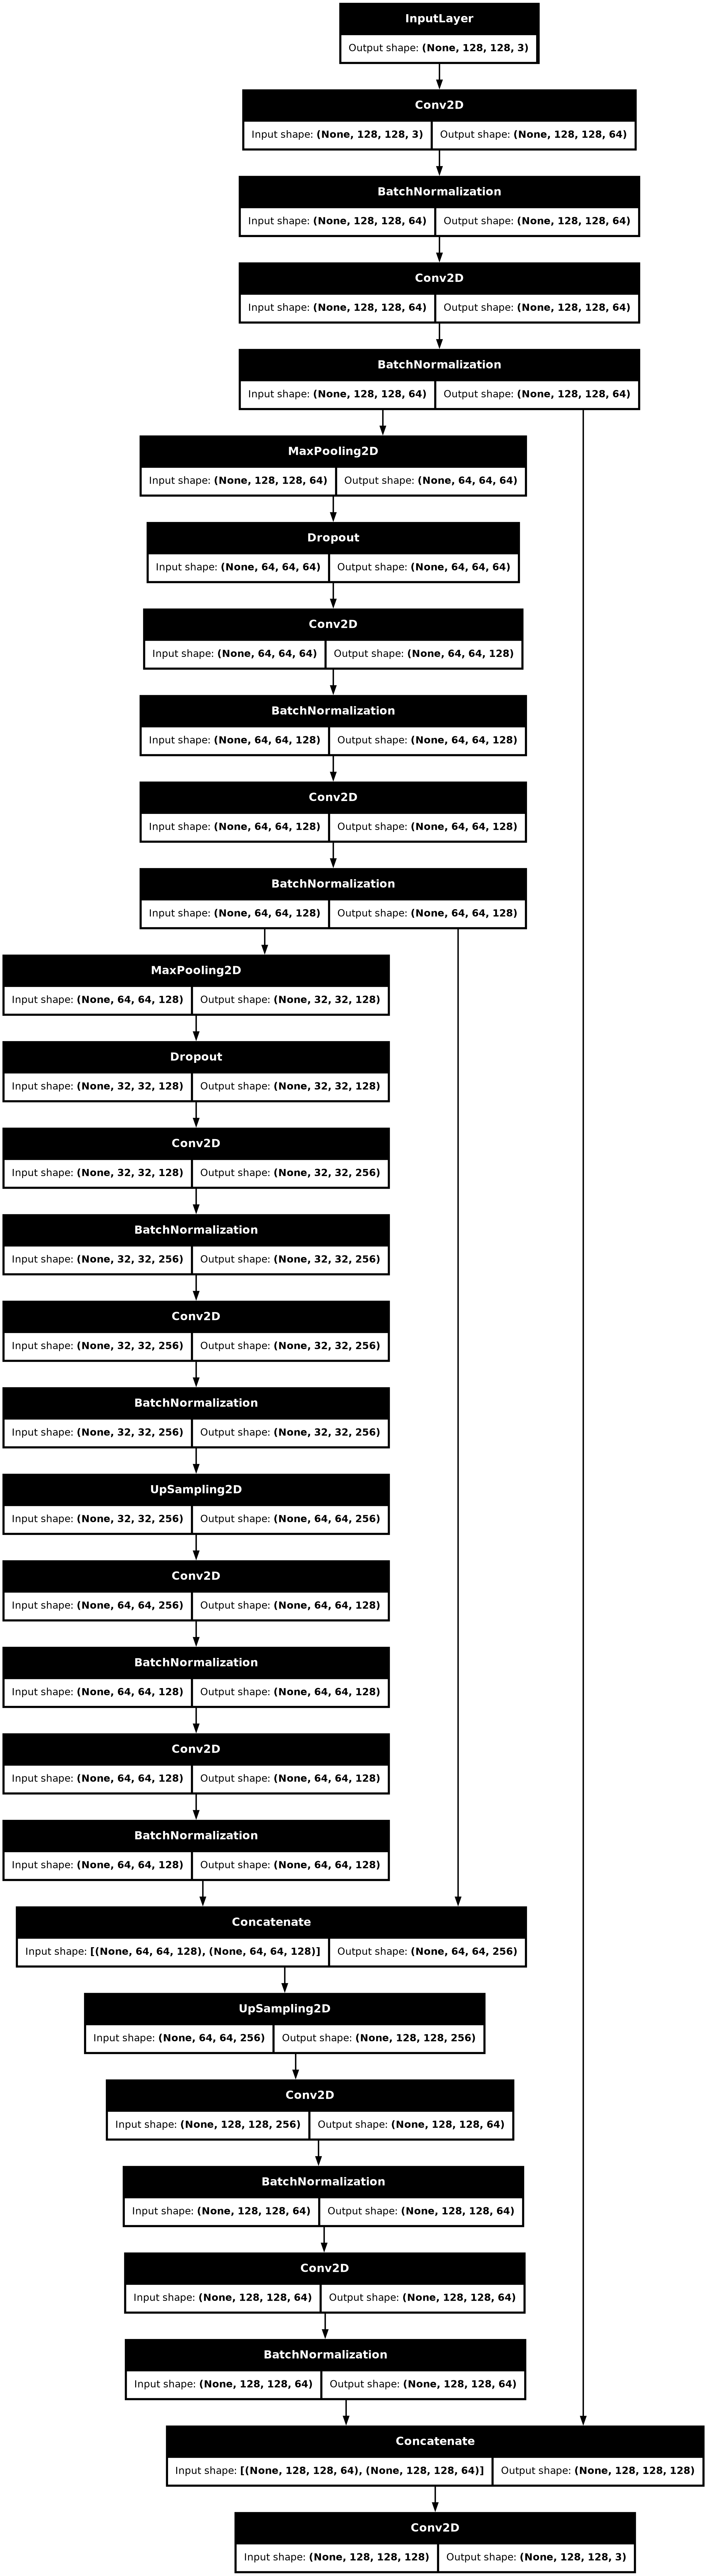

In [22]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model3, show_shapes=True)


In [ ]:
# Define the learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())  # Convert to Python float

# Initialize and compile the model
model = unet_model(input_shape=(128, 128, 3), num_classes=3)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[dice_coefficient, mean_iou])  # Replace dice_coefficient and mean_iou with built-in metrics or custom implementations

# Define the callbacks
checkpoint = ModelCheckpoint("unet_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
lr_scheduler_callback = LearningRateScheduler(lr_scheduler, verbose=1)
tensorboard_callback3 = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
wandb_callback = WandbCallback()  # Correctly instantiate the WandbCallback

# Start training the model
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=50,
                    batch_size=32,
                    callbacks=[checkpoint, early_stopping, lr_scheduler_callback, tensorboard_callback3])  # Ensure tensorboard_callback3 is properly defined


## Evaluating the model and calculating different metrices

In [ ]:
# Evaluate the model
test_scores1 = model.evaluate(x_test, y_test)
print(f"Test Dice Coefficient: {test_scores1[1]}")
print(f"Test Mean IoU: {test_scores1[2]}")
# Log to Weights & Biases
wandb.log({
    "Test Dice Coefficient": test_scores1[1],
    "Test Mean IoU": test_scores1[2]
})



In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

# Dictionary of additional metrics
additional_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'specificity': specificity,
    'f1_score': f1_score,
    'jaccard_index': jaccard_index
}
# Create a file writer for the log directory
file_writer = tf.summary.create_file_writer(log_dir3 + "/metrics")

for metric_name, metric_func in additional_metrics.items():
    score = metric_func(y_test, y_pred)
    aggregated_score = np.mean(score.numpy())  # Calculate the mean across all classes
    print(f"Test {metric_name}: {aggregated_score}")
    wandb.log({f"Test {metric_name}": aggregated_score})
    tf.summary.scalar(f"Test {metric_name}", aggregated_score, step=0)

In [ ]:
# Function to plot training and validation metrics
def plot_history(history):
    # Create a figure for plotting
    plt.figure(figsize=(18, 4))

    # Plot training & validation loss values
    plt.subplot(1, 3, 1)  # Adjusted to 1 row, 3 columns
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation Dice coefficient values
    plt.subplot(1, 3, 2)  # Adjusted to 1 row, 3 columns
    plt.plot(history.history['dice_coefficient'])
    plt.plot(history.history['val_dice_coefficient'])
    plt.title('Dice Coefficient')
    plt.ylabel('Dice Coefficient')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation IoU values
    plt.subplot(1, 3, 3)  # New subplot for IoU
    plt.plot(history.history['mean_iou'])
    plt.plot(history.history['val_mean_iou'])
    plt.title('Mean IoU')
    plt.ylabel('Mean IoU')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Adjust layout
    plt.tight_layout()
    plt.show()
# Plot the training history
plot_history(history)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a random index from the test dataset
image_index = random.randint(0, len(x_test) - 1)

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model1
predicted_mask = model2.predict(np.expand_dims(input_image, axis=0))[0]

# Convert the predicted mask to class labels using argmax
predicted_mask_classes = np.argmax(predicted_mask, axis=-1)

# Convert the true mask to class labels using argmax
true_mask_classes = np.argmax(true_mask, axis=-1)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 2)
plt.imshow(true_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('True Mask')

# Plot predicted mask with a colormap to differentiate liver and tumor
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_classes, cmap='jet')  # Use 'jet' colormap for different classes
plt.title('Predicted Mask')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Function to log sample images and masks to Weights & Biases
def log_images_to_wandb(x_test, y_test, y_pred, num_samples=2):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    for i in sample_indices:
        input_image = x_test[i]
        true_mask = y_test[i]
        predicted_mask = y_pred[i]

        # Plot images
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(input_image)
        axes[0].set_title('Original Image')
        axes[1].imshow(true_mask[:, :, 0], cmap='gray')
        axes[1].set_title('True Mask')
        axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
        axes[2].set_title('Predicted Mask')
        wandb.log({"example_image": wandb.Image(fig)})
        plt.close(fig)

# Log images after model prediction
y_pred = model.predict(x_test)
log_images_to_wandb(x_test, y_test, y_pred)


In [ ]:
import tensorflow as tf

# Function to log sample images and masks to TensorBoard
def log_images_to_tensorboard(x_test, y_test, y_pred, num_samples=3, log_dir3="logs/fit"):
    sample_indices = random.sample(range(len(x_test)), num_samples)
    file_writer = tf.summary.create_file_writer(log_dir3 + "/images")
    with file_writer.as_default():
        for i in sample_indices:
            input_image = x_test[i]
            true_mask = y_test[i]
            predicted_mask = y_pred[i]

            # Plot images
            fig, axes = plt.subplots(1, 3, figsize=(12, 4))
            axes[0].imshow(input_image)
            axes[0].set_title('Original Image')
            axes[1].imshow(true_mask[:, :, 0], cmap='gray')
            axes[1].set_title('True Mask')
            axes[2].imshow(predicted_mask[:, :, 0], cmap='gray')
            axes[2].set_title('Predicted Mask')

            # Convert plot to image and log to TensorBoard
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            image = tf.image.decode_png(buf.getvalue(), channels=4)
            image = tf.expand_dims(image, 0)
            tf.summary.image(f"Example Image {i}", image, step=0)
            plt.close(fig)

# Log images after model prediction
y_pred = model1.predict(x_test)
log_images_to_tensorboard(x_test, y_test, y_pred)


### Note on TensorBoard and Weights & Biases

In the Kaggle environment, TensorBoard is disabled. As a result, I have used Weights & Biases for tracking experiments and visualizations.

If you are running this notebook on a local machine with TensorBoard enabled, the TensorBoard code will run as expected. Please ensure that TensorBoard is properly set up in your local environment to view the logs and visualizations.




In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

